In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [8]:
for i in range(1,10):
    image=cv2.imread('/content/canopy/100'+str(i)+'.jpg')
    image_lab=cv2.cvtColor(image,cv2.COLOR_RGB2LAB)
    ret,image_result=cv2.threshold(image_lab[:,:,1],0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
    kernel=cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5))
    image_result=cv2.morphologyEx(image_result, cv2.MORPH_CLOSE, kernel)
    crop=cv2.bitwise_and(image,image,mask=image_result)
    cv2.imwrite('/content/images/'+str(i)+'.jpg',crop)

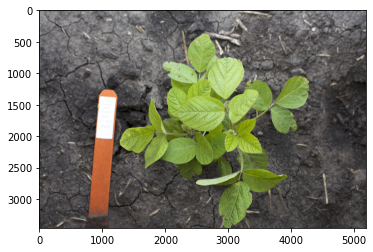

In [9]:
plt.imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))

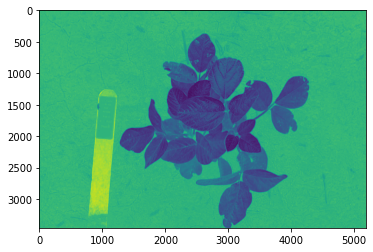

In [10]:
plt.imshow(image_lab[:,:,1])

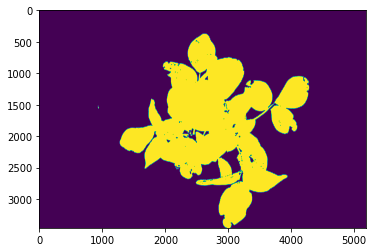

In [11]:
plt.imshow(image_result)

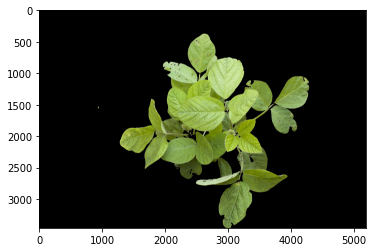

In [13]:
plt.imshow(cv2.cvtColor(crop,cv2.COLOR_BGR2RGB))

In [36]:
import cv2
import matplotlib.pyplot as plt
import keras
import numpy as np
image=cv2.imread('/content/annotated/1_i.jpg')
image_original=cv2.imread('/content/images/1.jpg')
image_original=cv2.cvtColor(image_original,cv2.COLOR_BGR2RGB)
model_120 = keras.models.load_model("/content/model 120 x 120.h5")
model_80= keras.models.load_model("/content/model 80 x 80.h5")
model_100= keras.models.load_model("/content/model 100 x 100.h5")
image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
image_lab=cv2.cvtColor(image,cv2.COLOR_RGB2LAB)
ret,image_result=cv2.threshold(image_lab[:,:,1],0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
contours = cv2.findContours(image_result, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
contours = contours[0] if len(contours) == 2 else contours[1]
image_original_copy=image_original.copy()
for c in contours:
    x,y,w,h=cv2.boundingRect(c)
    cv2.rectangle(image_original_copy,(x,y),(x+w,y+h),(255,0,0),20)
    ROI=cv2.resize(image_original[y:y+h,x:x+w],(120,120))
    ROI_reshape=np.reshape(ROI,(1,120,120,3))
    prediction_120=list(model_120.predict(ROI_reshape)[0])
    p_120=prediction_120.index(max(prediction_120))+1
    ROI=cv2.resize(image_original[y:y+h,x:x+w],(80,80))
    ROI_reshape=np.reshape(ROI,(1,80,80,3))
    prediction_80=list(model_80.predict(ROI_reshape)[0])
    p_80=prediction_80.index(max(prediction_80))+1
    ROI=cv2.resize(image_original[y:y+h,x:x+w],(100,100))
    ROI_reshape=np.reshape(ROI,(1,100,100,3))    
    prediction_100=list(model_100.predict(ROI_reshape)[0])
    p_100=prediction_100.index(max(prediction_100))+1
    ps=[p_120,p_100,p_80]
    k=[j for i, j in enumerate(ps) if ps[:i].count(j) == 1]
    if(k!=[]):
        p=k[0]
    else:
        p=ps[0]
    cv2.putText(image_original_copy, str(p), (x+w//2,y+h//2), cv2.FONT_HERSHEY_SIMPLEX, 8, (255,0,255), 15)    

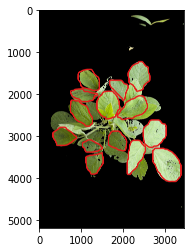

In [37]:
plt.imshow(image)

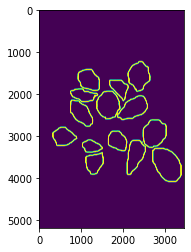

In [38]:
plt.imshow(image_result)

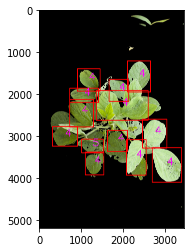

In [39]:
plt.imshow(image_original_copy)